# An Introduction to the Discrete Fourier Transform

# Lecture 2: Digital Audio Basics

## The following is the exercises for Lecture 2 on the Discrete Fourier Transform. See this lecture video [here](https://www.youtube.com/watch?v=z6mzctYjVMc). For more supplemental resources, see also the course [website](https://longbaonguyen.github.io/courses/dft/discrete_fourier.html). 

### The "clarinet.wav" file is synthesized by one of my students Lukas Maldonadowerk.


## Exercises


In [41]:
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
from scipy.io import wavfile
%matplotlib notebook

#### The following two functions are taken from the previous Lecture 1's exercises. It will be helpful to use these functions in the following problems.

In [42]:
def plot_signal_time(ys, t1, t2, fs = 44100):
    """ plots the signal ys on the time domain [t2, t2] 
    at the sampling rate fs. 
    """
    N = ys.size # num of samples
    L = N/fs # duration of audio clip
    ts = np.linspace(0,L,N) # array of N equally spaced values from [0,L]
    fig, ax = plt.subplots()
    ax.plot(ts, ys)
    ax.set_xlim(t1, t2)
    ax.set_xlabel("Time(in seconds)")



In [43]:
def plot_signal_frequency(ys, f1, f2, fs = 44100):
    """ plots the signal ys on the frequency domain [f1, f2] 
    at the sampling rate fs. 
    """
    N = ys.size
    L = N/fs
    yk = np.fft.fft(ys)
    k = np.arange(N) # 0 to N-1
    freqs = k/L
    fig, ax = plt.subplots()
    ax.plot(freqs, np.abs(yk))
    ax.set_xlim(f1,f2)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("|yk|")


#### Sample from the waveform which is the sum of two sinusoids with frequencies 6 Hz and 10 Hz at the sampling rate of 100 Hz for 1 second. Plot its time domain graph using `plot_signal_time` function above.

#### Hint: $y(t) = \sin(2\pi\cdot ft), t\in [0,L]$ is the sinuosoid with frequency $f$ Hz.

<IPython.core.display.Javascript object>


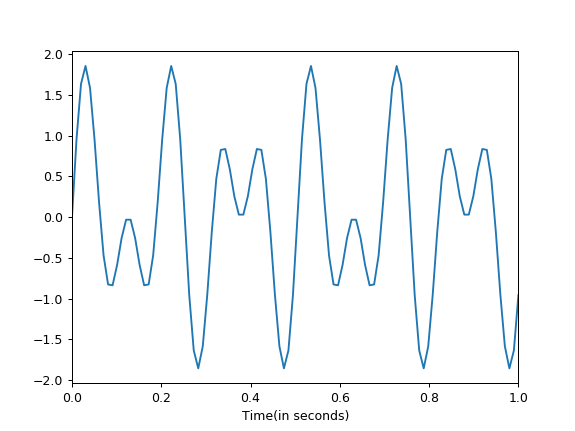

In [44]:
ts = np.linspace(0,1,100,endpoint=False)
ys = np.sin(2*np.pi*6*ts)+np.sin(2*np.pi*10*ts)
plot_signal_time(ys,0,1,fs=100)

#### Plot its frequency domain graph using `plot_signal_frequency` above on the domain [0, 50] Hz interval.

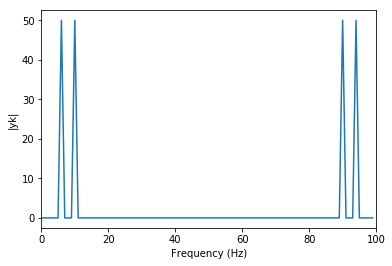

In [33]:
plot_signal_frequency(ys,0,100,fs=100)

#### Plot again its frequency domain graph but on the [0,100] Hz interval. What do you notice? (In Lecture 3, we learn that every real signal has a symmetric spectrum. We will also prove this in the exercises for Lecture 4)

#### Create an array of samples `ys1` of the sinusoid with frequency 6 Hz at the rate 100 Hz for L = 0.5 second. And an array `ys2` with frequency 10 Hz at the same rate and length. Use np.append() to concatenate the arrays. Call this array `ys3`. This audio is the notes played in succession rather than together as a chord. Plot the `y3` array using plot_signal_time on the [0,1] interval.

<IPython.core.display.Javascript object>


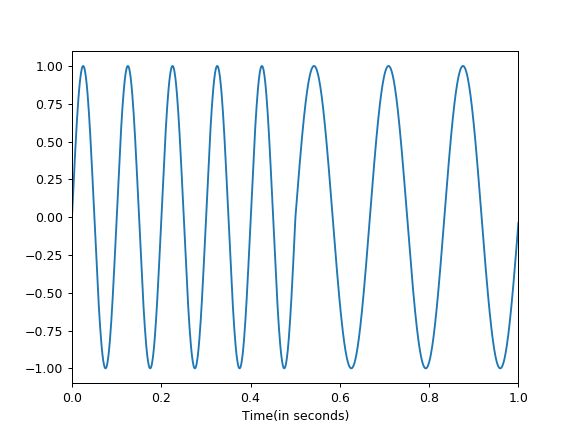

In [45]:
ts = np.linspace(0,.5,500,endpoint=False)
ys1 = np.sin(2*np.pi*10*ts)
ys2 = np.sin(2*np.pi*6*ts)
ys3 = np.append(ys1, ys2)
plot_signal_time(ys3,0,1,fs=1000)

#### Now plot the frequency domain of `y3` on the interval [0,50] Hz. Compare this to the previous frequency domain representation of the array `ys`.

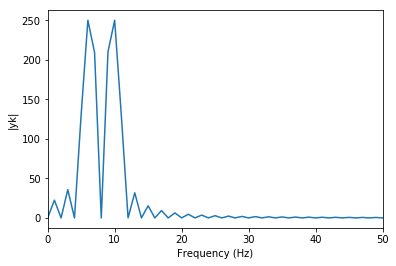

In [28]:
plot_signal_frequency(ys3,0,50,fs=1000)

#### Read in the "clarinet.wav" file and play the audio.

#### Plot the frequency domain representation. Programmatically find the fundamental frequency and the dominant frequency(largest Fourier coefficent magnitude) exactly. HInt: Use np.argsort(array) to sort the array to find the index of the largest. Then use the formula $f_k=k/L$ to find the corresponding frequency.

### Aliasing

#### Sample from a sinusoid with frequency 50 Hz with a sampling rate of fs = 100 Hz for 1 second.  

<IPython.core.display.Javascript object>


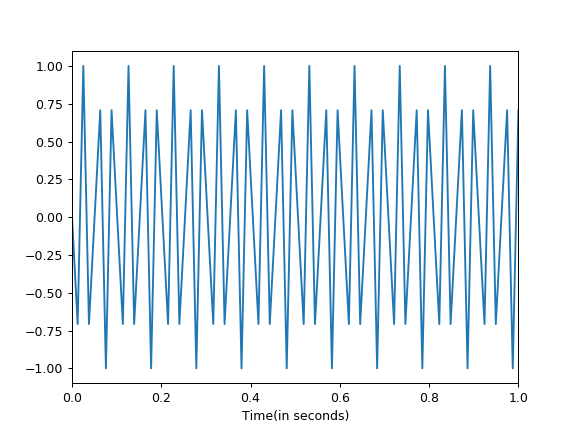

In [46]:
fs = 80
L = 1
N = int(fs*L)
ts = np.linspace(0,L,N,endpoint=False)
ys = np.sin(2*np.pi*50*ts)
plot_signal_time(ys,0,1,fs=80)


#### Plot its frequency domain representation. Does the DFT detect the 50 Hz component?

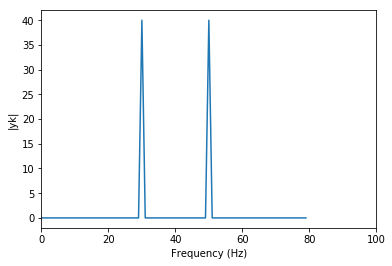

In [40]:
plot_signal_frequency(ys,0,100,fs=80)

#### Redo the problem by sampling from the same sinusoid with frequency 50 Hz but this time with a sampling rate of fs = 80 Hz for 1 second.  Plot its frequency domain representation. Does the DFT now detect the 50 Hz component? What happened to that component? What is the aliased frequency that the DFT detect? This problem illustrate aliasing and how a 50 Hz signal, that is larger than the Nyquist frequency is distorted to look like a lower aliased frequency. 

#### This is why a sampling of 44100 Hz is needed to ensure that all frequencies in the human hearing range 20-20000 Hz is properly recorded. 